# dataset/review

for CamVid and CamVid-like datasets

In [1]:
from abcli.modules import objects
from abcli import fullname
from abcli.plugins import cache
from roofAI import NAME, VERSION
from roofAI.dataset import RoofAIDataset, MatrixKind
from abcli import string
from abcli.plugins import seed
import numpy as np

import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{NAME}-{VERSION}.{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
roofAI-3.355.1.abcli-7.2679.1-unknown, built on 15 February 2024, 19:25:51


In [2]:
if False:
    # dataset_alias = "roofAI_ingest_CamVid_v1"
    # dataset_alias = "roofAI_ingest_AIRS_cache"
    dataset_alias = "roofAI_ingest_AIRS_v2"

    dataset_object_name = cache.read(dataset_alias)
else:
    dataset_object_name = "roofAI_ingest_AIRS_2024-02-14-19-25-55-40077"

In [3]:
subset = "test"
index = 0

In [4]:
%%bash -s $dataset_object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

dataset_object_name=$1

abcli download object $dataset_object_name

🔋 gpu: not found.
🚀 abcli-7.2679.1.2023-06-aws-batch-a
downloading roofAI_ingest_AIRS_2024-02-14-19-25-55-40077: open ...
download completed: roofAI_ingest_AIRS_2024-02-14-19-25-55-40077 


In [5]:
dataset = RoofAIDataset(objects.object_path(dataset_object_name))

RoofAIDataset[kind:DatasetKind.SAGEMAKER,source:AIRS](roofAI_ingest_AIRS_2024-02-14-19-25-55-40077): 3 subset(s): 1 X test + 10 X train + 10 X val - 2 class(es): other, roof


record_id: christchurch_1011-00000-00000
RoofAIDataset[roofAI_ingest_AIRS_2024-02-14-19-25-55-40077].get_filename(test,christchurch_1011-00000-00000,MatrixKind.IMAGE): /Users/kamangir/storage/abcli/roofAI_ingest_AIRS_2024-02-14-19-25-55-40077/test/christchurch_1011-00000-00000.png
RoofAIDataset[roofAI_ingest_AIRS_2024-02-14-19-25-55-40077].get_matrix(test,christchurch_1011-00000-00000,MatrixKind.IMAGE): 384x480x3:uint8
RoofAIDataset[roofAI_ingest_AIRS_2024-02-14-19-25-55-40077].get_filename(test,christchurch_1011-00000-00000,MatrixKind.MASK): /Users/kamangir/storage/abcli/roofAI_ingest_AIRS_2024-02-14-19-25-55-40077/test_annotation/christchurch_1011-00000-00000.png
RoofAIDataset[roofAI_ingest_AIRS_2024-02-14-19-25-55-40077].get_matrix(test,christchurch_1011-00000-00000,MatrixKind.MASK): 384x480:uint82 unique value(s): [  0 255]
-> /Users/kamangir/storage/abcli/roofAI_ingest_AIRS_2024-02-14-19-25-55-40077/_review/christchurch_1011-00000-00000.png


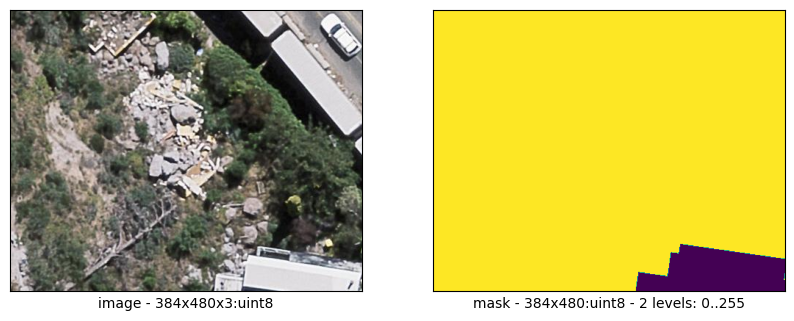

In [6]:
dataset.visualize(
        subset=subset,
        index=index,
        in_notebook=True,
        log=True,
    )

In [7]:
record_id = dataset.list_of_record_id(subset=subset)[index]
mask = dataset.get_matrix(subset=subset, record_id=record_id, kind=MatrixKind.MASK)

mask.dtype, np.unique(mask)

(dtype('uint8'), array([  0, 255], dtype=uint8))

In [8]:
seed.log(dataset_object_name)

abcli select roofAI_ingest_AIRS_2024-02-14-19-25-55-40077; open .


In [9]:
# END